# COS60008 Introduction to Data Science
## Assignment 3
## Student Details:
* Name: Kan Asvasena
* Student ID:
* Email:
* Submission Date: 23 June 2023
* TuteLab Class:

## Task 4 – Modelling & Assessment (25%)

### Import Dependencies and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from eli5.sklearn import PermutationImportance

%config InlineBackend.figure_format='retina'

### Load Data

In [2]:
# load csv
path = '../data/processed/'

X_train = pd.read_csv(path + 'a_X_train.csv')
y_train = pd.read_csv(path + 'a_y_train.csv')
X_test = pd.read_csv(path + 'a_X_test.csv')
y_test = pd.read_csv(path + 'a_y_test.csv')

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### 4.1 Models

This section presents five models, which include one Linear Regression and four variants of the Multi-layer Perceptron (MLP) Regressor. Each MLP model is fine-tuned by adding hyperparameters incrementally **on top of the previous settings**. The table below illustrates the configuration for each model:

| <center>Model</center>             | <center>Hyperparametre</center>                                                                  |
|-------------------|--------------------------------------------------------------------------|
| 1. Linear Regression | default                                                                        |
| 2. MLP Regressor     | max_iter=30000                                                           |
| 3. MLP Regressor     | max_iter=30000, <br>solver='lbfgs'                                           |
| 4. MLP Regressor     | max_iter=30000, <br>solver='lbfgs', <br>hidden_layer_sizes=(30, 30, 30)          |
| 5. MLP Regressor     | max_iter=30000, <br>solver='lbfgs', <br>hidden_layer_sizes=(30, 30, 30), <br>alpha=0 |


Prepare variables and functions

In [3]:
# a dict to contain the evaluation
results = {'Model': ['1. Linear Regression', 
                      '2. MLP Regressor (max_iter=30000)', 
                      "3. MLP Regressor (add solver='lbfgs' on top of 2.)", 
                      "4. MLP Regressor (add hidden_layer_sizes=(30, 30, 30) on top of 3.)", 
                      "5. MLP Regressor (add alpha=0 on top of 4.)"],
           'Mean Absolute Error': [],
           'Mean Squared Error': [],
           'Root Mean Squared Error': []}

random_state = 10

def evaluation(y_pred, y_test=y_test, dict=results):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # append the results to the dict
    results['Mean Absolute Error'].append(mae)
    results['Mean Squared Error'].append(mse)
    results['Root Mean Squared Error'].append(rmse)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')

Use GridSearchCV to guide the adjustment of parameters in Multi-layer Perceptron Regressor

In [4]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (50,50), (33,33,33), (20,20,20)],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0],
    'learning_rate': ['constant','adaptive'],
}

# Initialize the MLP regressor
mlp = MLPRegressor(max_iter=30000, 
                   random_state=random_state,
                   early_stopping=True,)

# Initialize the grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Print the mean test scores for all parameter combinations
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Root mean validation score: {-mean_score:.3f} (MSE) for parameters: {params}")

print(f"Root mean validation score for best parameters: {-grid_search.best_score_}")
print("Best parameters found: ", grid_search.best_params_)

Root mean validation score: 62.748 (MSE) for parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Root mean validation score: 6.768 (MSE) for parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Root mean validation score: 62.748 (MSE) for parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Root mean validation score: 6.768 (MSE) for parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Root mean validation score: 48.414 (MSE) for parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Root mean validation score: 7.675 (MSE) for parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Root mean validation score: 48.414 (MSE) for parameters: {'alpha': 0.0001, 'hidden_l

#### 4.1.1 Linear Regression

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

evaluation(y_pred=y_pred)

Mean Absolute Error: 7.193762067749025
Mean Squared Error: 81.69097368267781
Root Mean Squared Error: 9.038305907783704


#### 4.1.2 Multi-layer Perceptron Regressor (max_iter=30000)

In [6]:
# Initialize the Multi-layer Perceptron regressor
mlp = MLPRegressor(random_state=random_state,
                   max_iter=30000)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

evaluation(y_pred=y_pred)

Mean Absolute Error: 3.907734188535732
Mean Squared Error: 25.438049016254165
Root Mean Squared Error: 5.04361467761507


#### 4.1.3 Multi-layer Perceptron Regressor (add solver='lbfgs' on top of 4.1.2)

In [7]:
# Initialize the Multi-layer Perceptron regressor
mlp = MLPRegressor(random_state=random_state,
                   max_iter=30000,
                   solver='lbfgs')

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

evaluation(y_pred=y_pred)

Mean Absolute Error: 2.100691893466935
Mean Squared Error: 8.40164397227635
Root Mean Squared Error: 2.8985589475248474


#### 4.1.4 Multi-layer Perceptron Regressor (add hidden_layer_sizes=(30, 30, 30) on top of 4.1.3)

In [8]:
# Initialize the Multi-layer Perceptron regressor
mlp = MLPRegressor(random_state=random_state,
                   max_iter=30000,
                   solver='lbfgs', 
                   hidden_layer_sizes=(30,30,30))

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

evaluation(y_pred=y_pred)

Mean Absolute Error: 1.8770049025176736
Mean Squared Error: 6.259179776166889
Root Mean Squared Error: 2.501835281581681


#### 4.1.5 Multi-layer Perceptron Regressor (add alpha=0 on top of 4.1.4)

In [9]:
# Initialize the Multi-layer Perceptron regressor
mlp = MLPRegressor(random_state=random_state,
                   max_iter=30000,
                   solver='lbfgs', 
                   hidden_layer_sizes=(30,30,30),
                   alpha=0)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

evaluation(y_pred=y_pred)

Mean Absolute Error: 2.066580482472711
Mean Squared Error: 7.909385307568236
Root Mean Squared Error: 2.812362940228063


### 4.2 Assessment

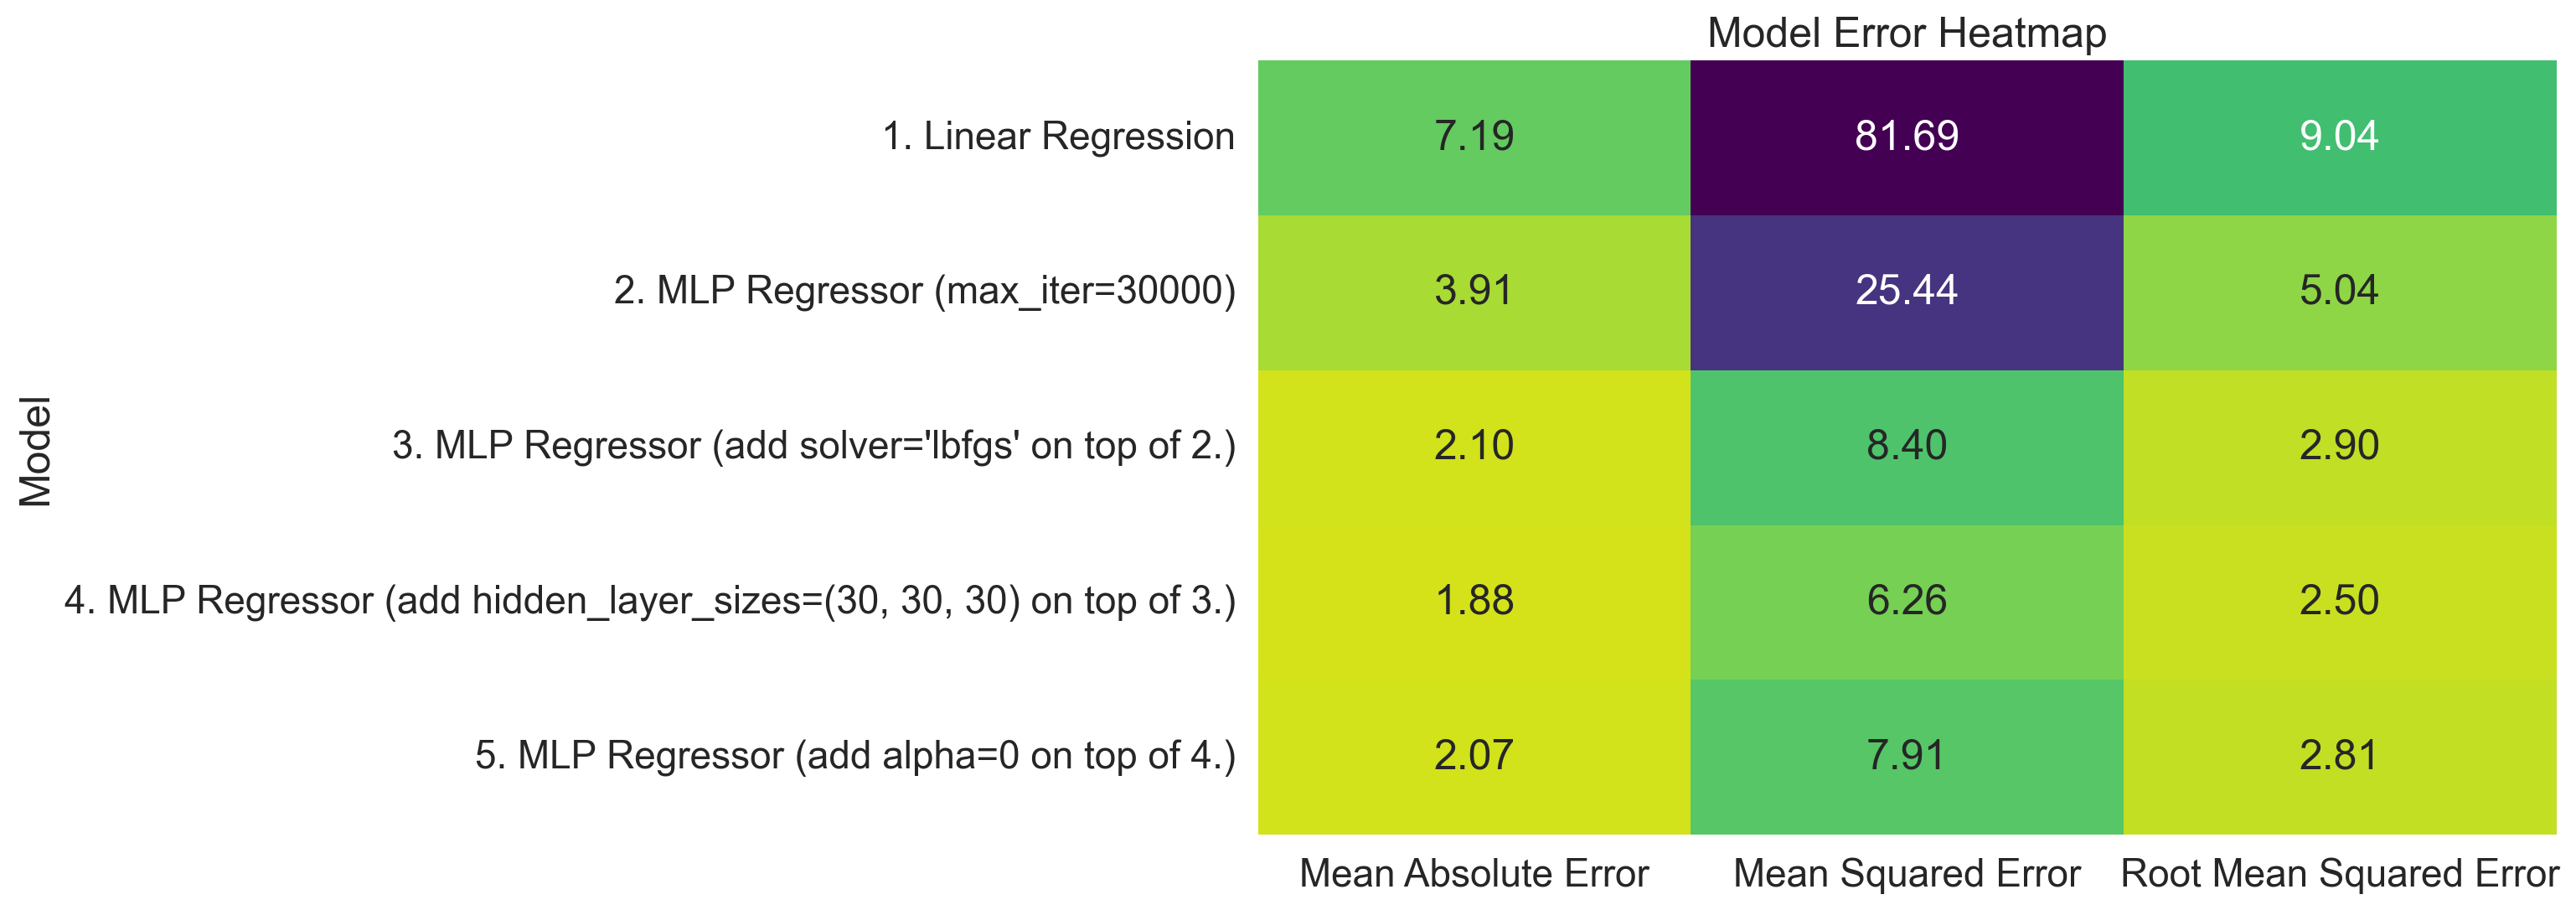

In [10]:
# Convert the dictionary to a dataframe
df = pd.DataFrame(results)

# Set 'Model' column as index
df.set_index('Model', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.heatmap(df, annot=True, fmt=".2f", cmap='viridis_r', vmin=0, vmax=30, cbar=False)
plt.title('Model Error Heatmap')
plt.show()

According to the Model Error Heatmap, the 5. MLP Regressor with max_iter=30000, solver='lbfgs', hidden_layer_sizes=(30, 30, 30), and alpha=0 performs the best in all metrics.

### 4.3 Permutation Importance

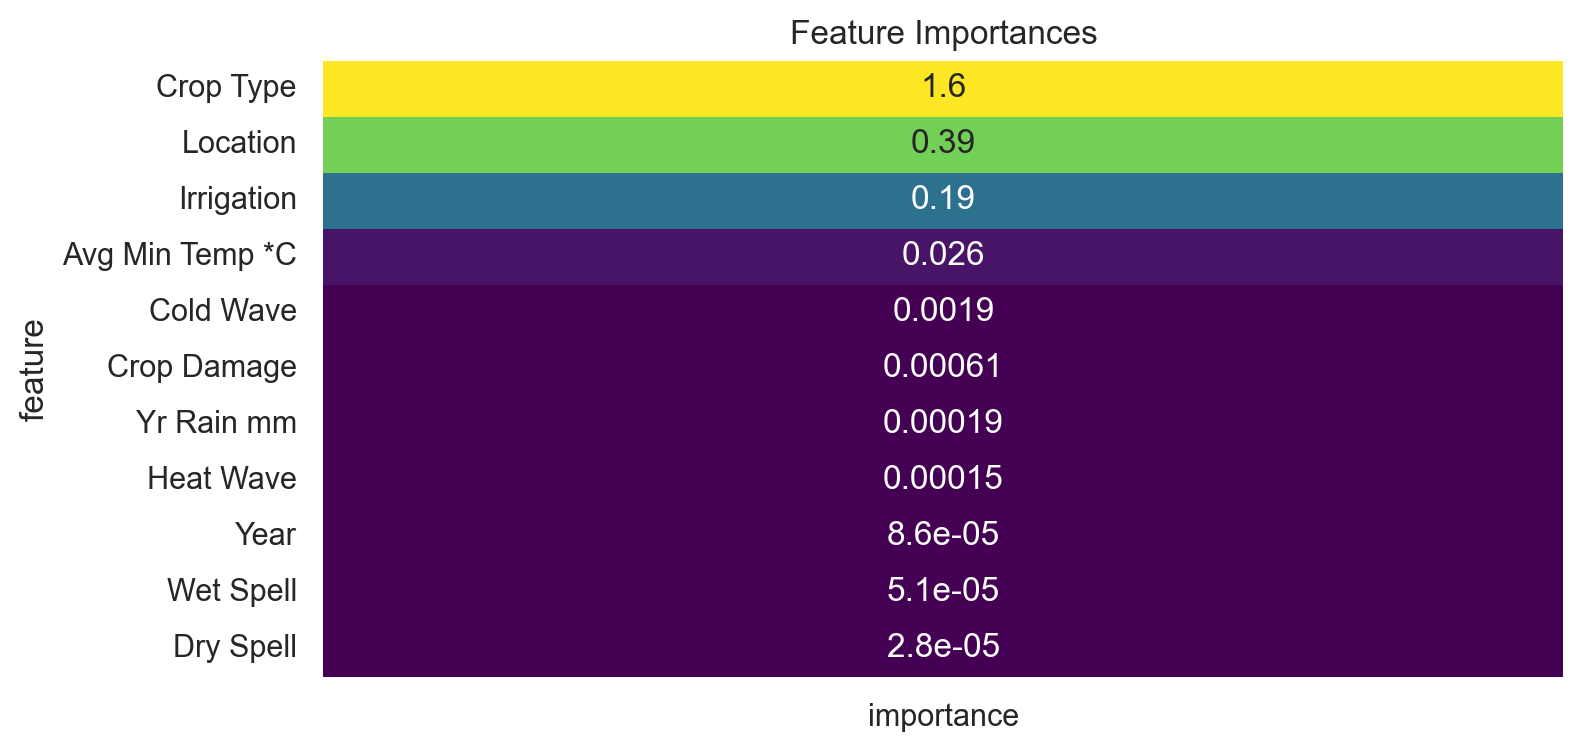

In [11]:
perm = PermutationImportance(mlp, random_state=random_state).fit(X_test, y_test)

# Capture feature importances from Permutation Importance
importances = pd.DataFrame({'feature': X_test.columns, 'importance': perm.feature_importances_})

# aggregate the feature importance of the one-hot encoded features
base_names = ['Crop Type_', 'Location_']
aggregated_importances = {}
# Loop over the base names
for base in base_names:
    base_importances = importances[importances['feature'].str.startswith(base)]['importance']
    aggregated_importances[base] = base_importances.sum()
# Update the importances dataframe with the aggregated values
for key, value in aggregated_importances.items():
    importances.loc[importances.feature.str.startswith(key), 'importance'] = value
# Remove the individual one-hot encoded features and keep only the aggregated ones
importances = importances.drop_duplicates(subset=['importance'])
importances['feature'] = importances['feature'].replace({'Crop Type_Maize': 'Crop Type', 'Location_East Xavierport': 'Location'})

# Sort the dataframe by importance in descending order
importances = importances.sort_values('importance', ascending=False)

# Plot a Heatmap
plt.figure(figsize=(8, 4))
sns.set(font_scale=1)
sns.heatmap(importances.set_index('feature'), annot=True, cmap='viridis', cbar=False, vmax=0.5)
plt.title('Feature Importances')
plt.show()

Finally, I examined the importance of each feature using the Permutation Importance method on the best model. It revealed that crop type, location, and irrigation have the most significant impact on the prediction, respectively.